In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pathlib as path
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os

In [2]:
plot_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Bloomberg\\Financial': ['.ipynb_checkpoints', '10ygsec.png', '12m_tbill.png', '3bbb_yield.csv', 'call_rate.csv', 'gsec_tenyr.csv', 'new.ipynb', 'tbill_oneyr.csv', 'tbill_oneyr.xlsx', 'usdinr.csv', 'usdinr.png', 'vix.csv', 'VIX.png', 'wti.csv']


In [3]:
local_path = os.getcwd()+"\\"

In [4]:
bl_path = "D:\\Downloads\\Vibhav tracker updates\\Bloomberg 10 Year Govt Bond TR Index.xlsx"

directory = "D:\\Downloads\\Vibhav tracker updates"
files = os.listdir(directory)  # Get all the files in that directory
print("Files in %r: %s" % (directory, files))


Files in 'D:\\Downloads\\Vibhav tracker updates': ['Bloomberg 10 Year Govt Bond TR Index.xlsx', 'Economic indicators 1.xlsx', 'Economic Indicators 15 apr.xlsx', 'Economic indicators 17 July.xlsx', 'Economic indicators 18th June.xlsx', 'Economic indicators 2 apr.xlsx', 'Economic indicators 2 July.xlsx', 'Economic indicators 22 May.xlsx', 'Economic indicators 24 Apr.xlsx', 'Economic indicators 28 March.xlsx', 'Economic indicators 29 May.xlsx', 'Economic indicators 30 April.xlsx', 'Economic indicators 7 may.xlsx', 'Economic indicators June 4.xlsx', 'input-data (2).xlsx', 'input-data.xlsx', 'NIMF Tracker-13 Mar 2022.pdf', 'NIMF Tracker-27 Mar 2022.pdf', 'notes tracker.docx', 'tracker 27 march vibhav 1.indd', 'tracker 27 march vibhav.indd', 'tracker.indd']


In [5]:
def concatter(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[:last_date_in_local][:-1], local_df])
    return final_df

In [6]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])
    return final_df

# 3ybbb

In [7]:
bbb = concatter2(file_name = "3bbb_yield.csv", col1=9, col2=10, rename_from="PX_LAST.3", rename_to="3BBB")
#Bloomberg 10 Year Govt Bond TR Index (13)

In [8]:
bbb.head()

,3BBB
Date,
2022-07-15,11.4230
2022-07-14,11.3525
2022-07-13,11.3042
2022-07-12,11.4174
2022-07-11,11.4491


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\979223966.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


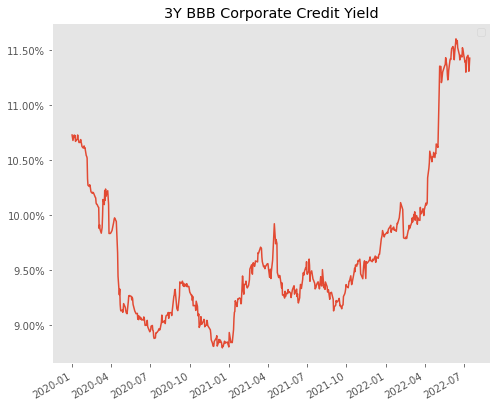

In [9]:
ax = bbb.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('3Y BBB Corporate Credit Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\3ybbb.png', dpi=150, bbox_inches='tight')

In [10]:
bbb.to_csv(data_output_dir+"\\3bbb_yield.csv")
bbb.to_csv("3bbb_yield.csv")

In [11]:
bbb.round(2)

,3BBB
Date,
2022-07-15,11.42
2022-07-14,11.35
2022-07-13,11.30
2022-07-12,11.42
2022-07-11,11.45
...,...
2020-01-07,10.71
2020-01-06,10.72
2020-01-03,10.68


# call

In [12]:
call = concatter2(file_name = "call_rate.csv", col1=3, col2=4, rename_from="PX_LAST.1", rename_to="call rate")

In [13]:
call.round(2)

,call rate
Date,
2022-07-15,4.77
2022-07-14,4.68
2022-07-13,4.67
2022-07-12,4.66
2022-07-11,4.69
...,...
2019-01-07,6.36
2019-01-04,6.35
2019-01-03,6.34


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\3485413063.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


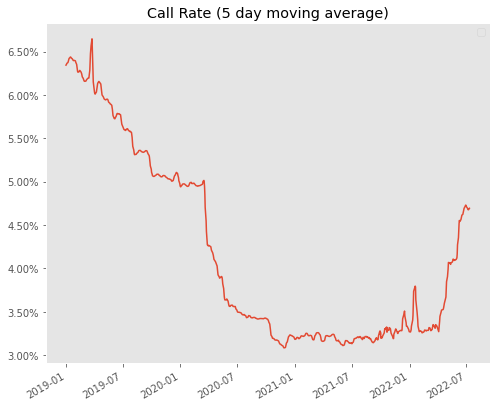

In [14]:
ax = call.rolling(5).mean().plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Call Rate (5 day moving average)')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\call.png', dpi=300, bbox_inches='tight')

In [15]:
call.to_csv(data_output_dir+"\\call_rate.csv")
call.to_csv("call_rate.csv")

In [16]:
call[::-1].rolling(5).mean().round(2)

,call rate
Date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,6.34
...,...
2022-07-11,4.69
2022-07-12,4.68
2022-07-13,4.68


# gsec

In [17]:
ten_yr = concatter2(file_name = "gsec_tenyr.csv", col1=6, col2=7, rename_from="PX_LAST.2", rename_to="10Y")

In [18]:
ten_yr.round(2)

,10Y
Date,
2022-07-15,7.44
2022-07-14,7.38
2022-07-13,7.34
2022-07-12,7.39
2022-07-11,7.43
...,...
2020-01-07,6.55
2020-01-06,6.57
2020-01-03,6.52


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\2694075316.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


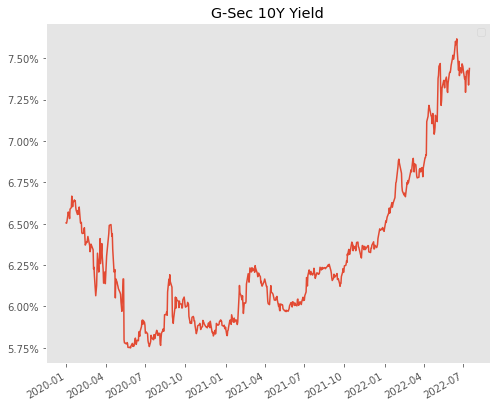

In [19]:
ax=ten_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('G-Sec 10Y Yield')
plt.grid(b=False)
plt.tight_layout()
plt.legend("")
plt.xlabel("")
plt.savefig(plot_output_dir+'\\10ygsec.png', dpi=300, bbox_inches='tight')


In [20]:
ten_yr

,10Y
Date,
2022-07-15,7.438
2022-07-14,7.384
2022-07-13,7.338
2022-07-12,7.394
2022-07-11,7.427
...,...
2020-01-07,6.554
2020-01-06,6.571
2020-01-03,6.515


In [21]:
ten_yr.to_csv(data_output_dir+"\\gsec_tenyr.csv")
ten_yr.to_csv("gsec_tenyr.csv")

# 1 yr t bill - somehow there is a parsing issue, do this manually

In [23]:
# new = pd.read_csv("/Users/vibhav/Desktop/tbill_oneyr 2.csv", index_col=0, parse_dates=True, dayfirst=True)

In [31]:
# new

In [32]:
# new.plot()

In [33]:
# new

In [22]:
one_yr = concatter2(file_name = "tbill_oneyr.csv", col1=18, col2=19, rename_from="PX_LAST.6", rename_to="12M")

In [35]:
# one_yr = pd.read_excel("/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Untitled Folder/2020-06-24/New/Copy/tbill_oneyr.xlsx", index_col=0, parse_dates=True)

In [36]:
# one_yr.index = pd.to_datetime(one_yr.index, format="%Y-%m-%d", dayfirst=True)

In [37]:
# one_yr = new

In [23]:
one_yr.head(10)

,12M
Date,
2022-07-15,6.16
2022-07-14,6.15
2022-07-13,6.13
2022-07-12,6.13
2022-07-11,6.11
2022-07-08,6.09
2022-07-07,6.11
2022-07-06,6.10
2022-07-05,6.10


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\1092937734.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


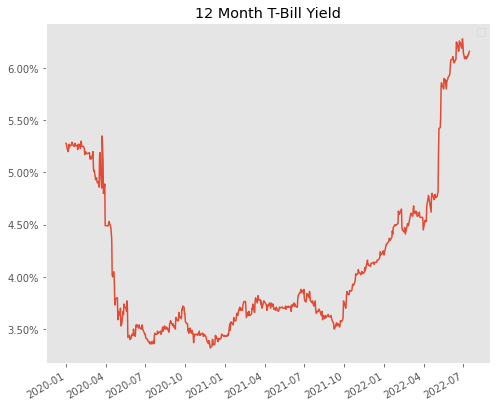

In [24]:
ax = one_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('12 Month T-Bill Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\12m_tbill.png', dpi=300, bbox_inches='tight')

In [25]:

one_yr.to_csv(data_output_dir+"\\tbill_oneyr.csv")
one_yr.to_csv("tbill_oneyr.csv")


# vix

In [26]:
vix = concatter2(file_name="vix.csv", col1=21, col2=22, rename_from="PX_LAST.7", rename_to="VIX")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\1759729172.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


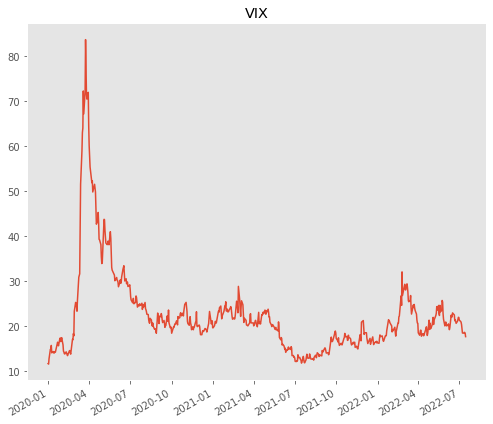

In [27]:
vix['VIX'].plot(figsize=(7,6))
plt.title('VIX')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")


plt.savefig(plot_output_dir+"\\vix.png", dpi=150, bbox_inches='tight')



In [28]:
vix.round(2).head(7)

,VIX
2022-07-15,17.60
2022-07-14,18.34
2022-07-13,18.52
2022-07-12,18.55
2022-07-11,18.37
2022-07-08,18.40
2022-07-07,19.20


In [29]:
vix.to_csv(data_output_dir+"\\vix.csv")
vix.to_csv("vix.csv")

# wti

In [30]:
wti = concatter2(file_name="wti.csv", col1=15, col2=16, rename_from="PX_LAST.5", rename_to="WTI")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\218164143.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


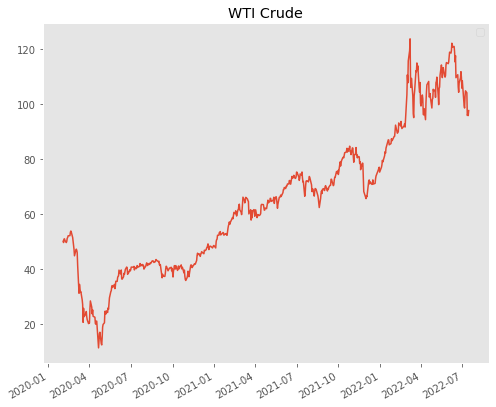

In [31]:
wti.plot(figsize=(7,6))
plt.title('WTI Crude')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\WTI.png', dpi=350, bbox_inches='tight')

In [32]:
wti.to_csv(data_output_dir+"\\wti.csv")
wti.to_csv("wti.csv")


In [33]:
wti.head(7)



,WTI
Date,
2022-07-15,97.59
2022-07-14,95.78
2022-07-13,96.30
2022-07-12,95.84
2022-07-11,104.09
2022-07-08,104.79
2022-07-07,102.73


In [34]:
a= 104/97.6
a-1


0.06557377049180335

# usd inr

In [62]:
# import yfinance as yf

In [41]:
# nifty_comm = yf.download("^CNXCMDT", start='2020-01-01', end=dt.datetime.today())

In [42]:
# nifty_comm

In [35]:
usd_inr = concatter2(file_name="usdinr.csv", col1=12, col2=13, rename_from="PX_LAST.4", rename_to="USD INR")

In [36]:
usd_inr.round(2)

,USD INR
Date,
2022-07-15,79.88
2022-07-14,79.88
2022-07-13,79.64
2022-07-12,79.60
2022-07-11,79.44
...,...
2021-12-27,75.00
2021-12-28,74.66
2021-12-29,74.74


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_4736\2180202844.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


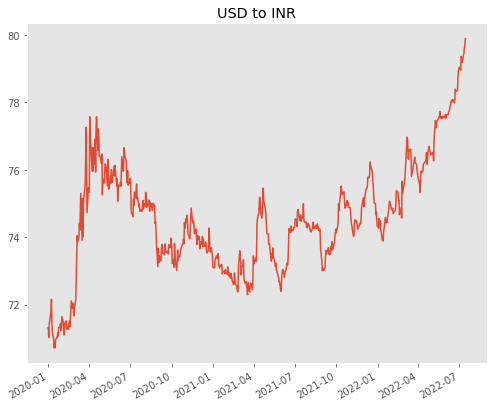

In [37]:
usd_inr['USD INR'].plot(figsize=(7,6), x_compat=True)
plt.title('USD to INR')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\usdinr.png', dpi=150, bbox_inches='tight')

In [53]:
usd_inr.to_csv("usdinr.csv")
usd_inr.to_csv(data_output_dir+"\\usdinr.csv")
